In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [2]:
# Load the Dataset
df = pd.read_csv('Dataset/malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
features = df.columns
print(features)

Index(['url', 'type'], dtype='object')


In [4]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [5]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [6]:
# pip install wordcloud

In [7]:
# plt.figure(figsize= (10 , 5))
# plt.title('Distribution of Types of Attacks')
# sns.countplot(x = 'type', data = df)
# # ax.bar_label(ax.containers[0])
# plt.xlabel('\Attacks')
# plt.savefig('./Images/Distribution of Types of Attacks.png', bbox_inches='tight')

### WordCloud of Different Types of Attacks

In [8]:
df_phish = df[df['type'] == 'phishing']
df_benign = df[df['type'] == 'benign']
df_deface = df[df['type'] == 'defacement']
df_malware = df[df['type'] == 'malware']

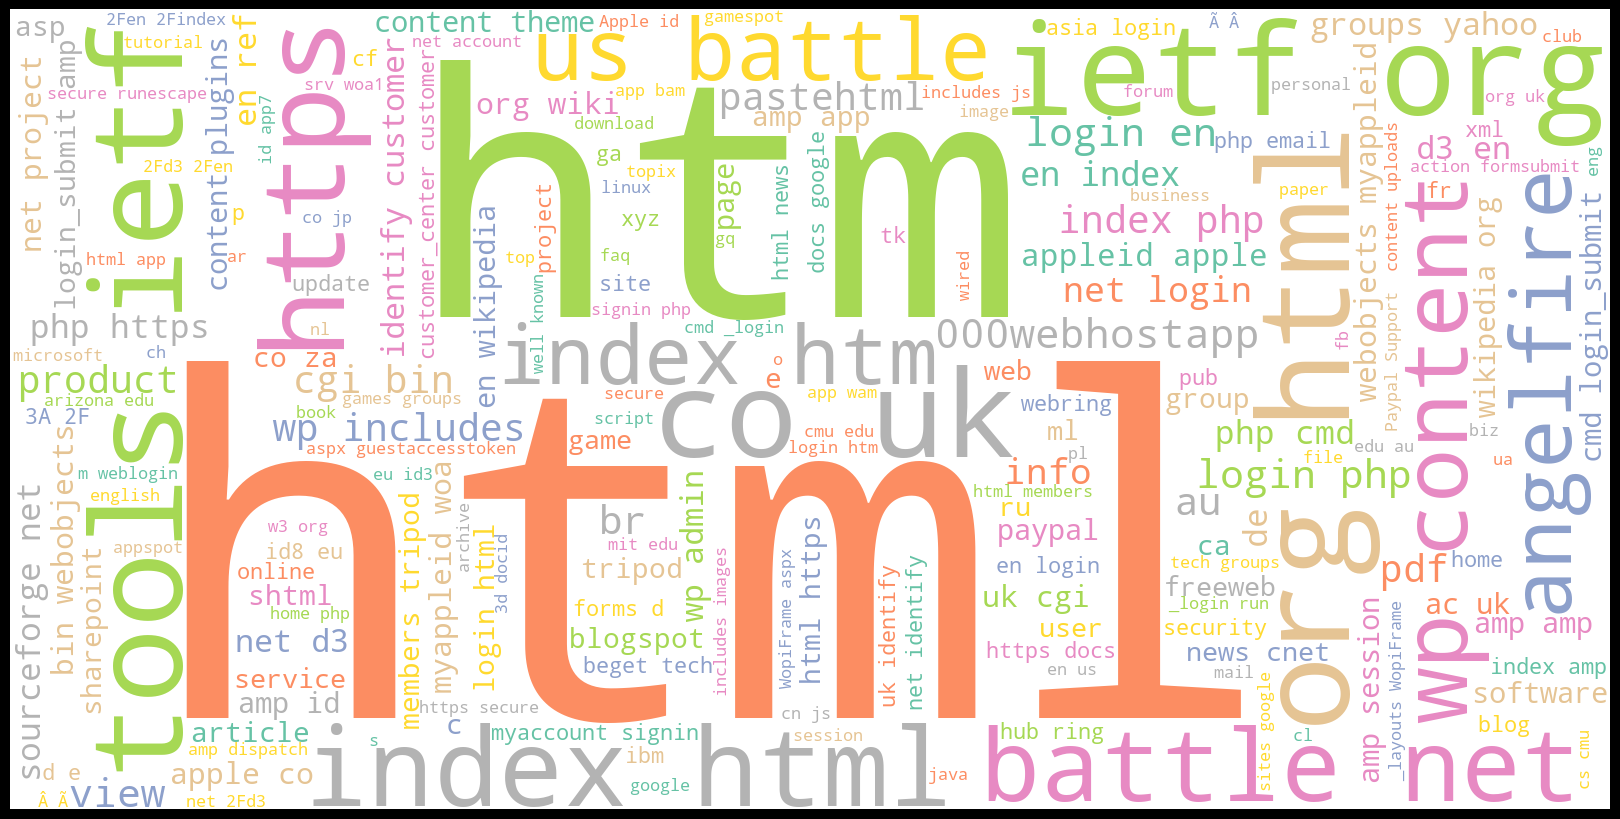

In [9]:
phish_url = " ".join(i for i in df_phish.url)
# print(phish_url[0: 1000])
wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(phish_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/phish_wordcloud.png', bbox_inches='tight')

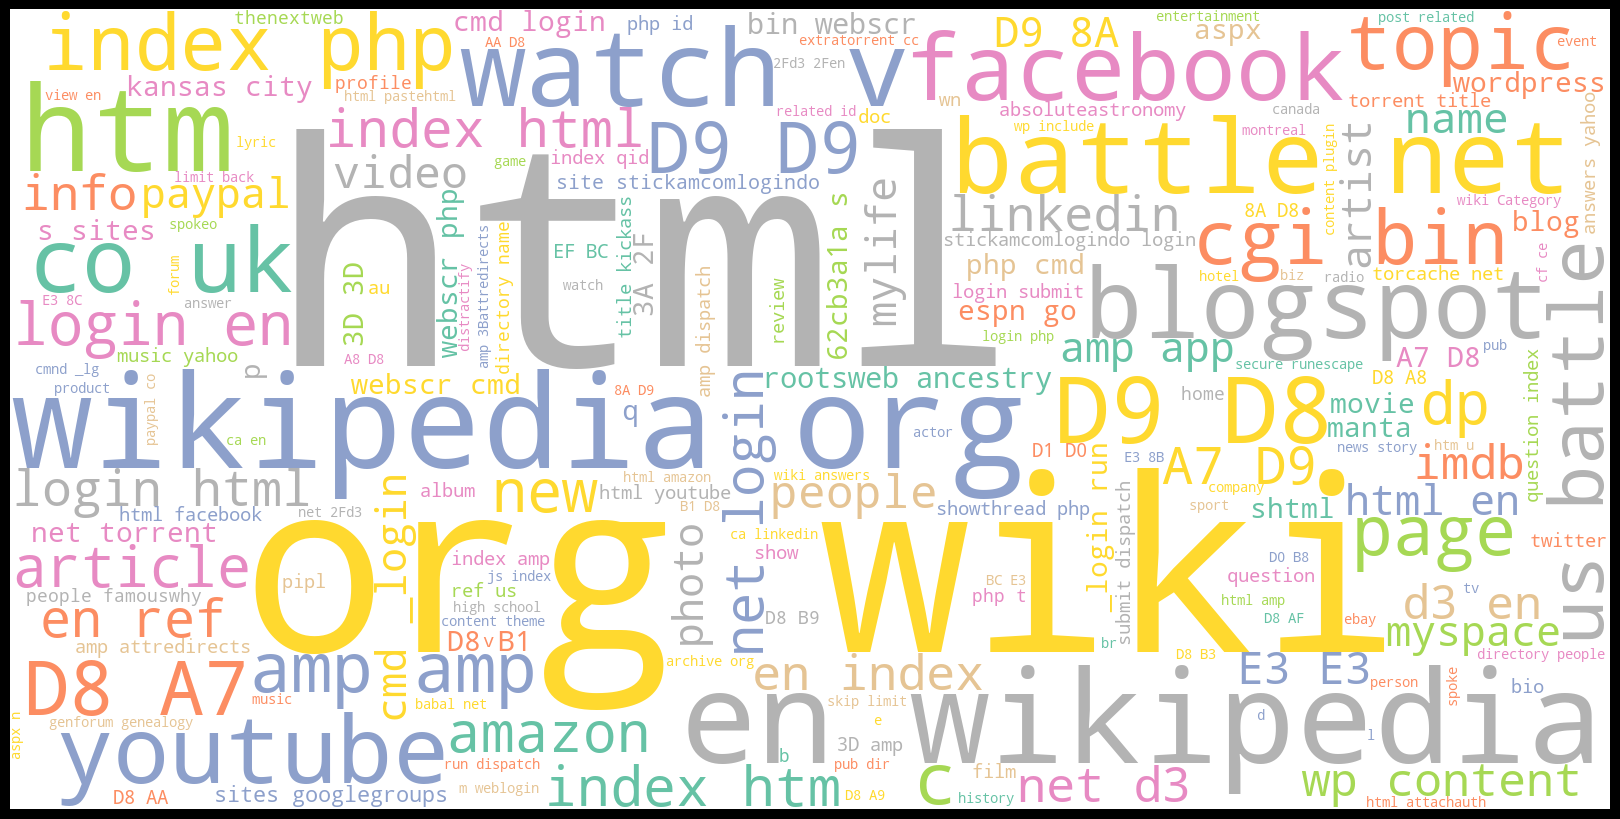

In [10]:
benign_url = " ".join(i for i in df_benign.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(benign_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/benign_wordcloud.png')

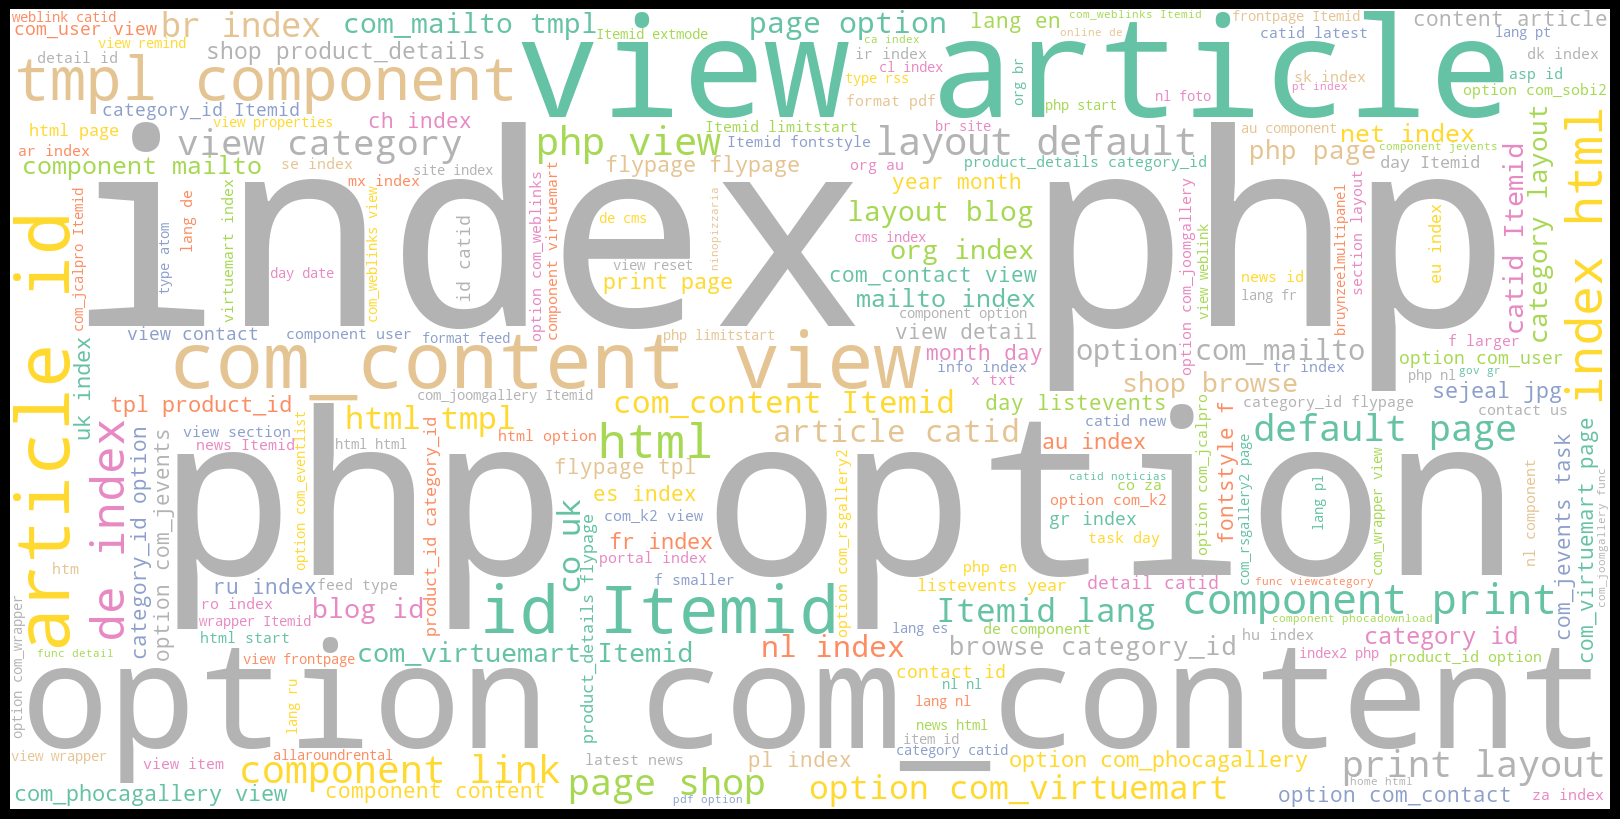

In [11]:
deface_url = " ".join(i for i in df_deface.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(deface_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/deface_wordcloud.png')

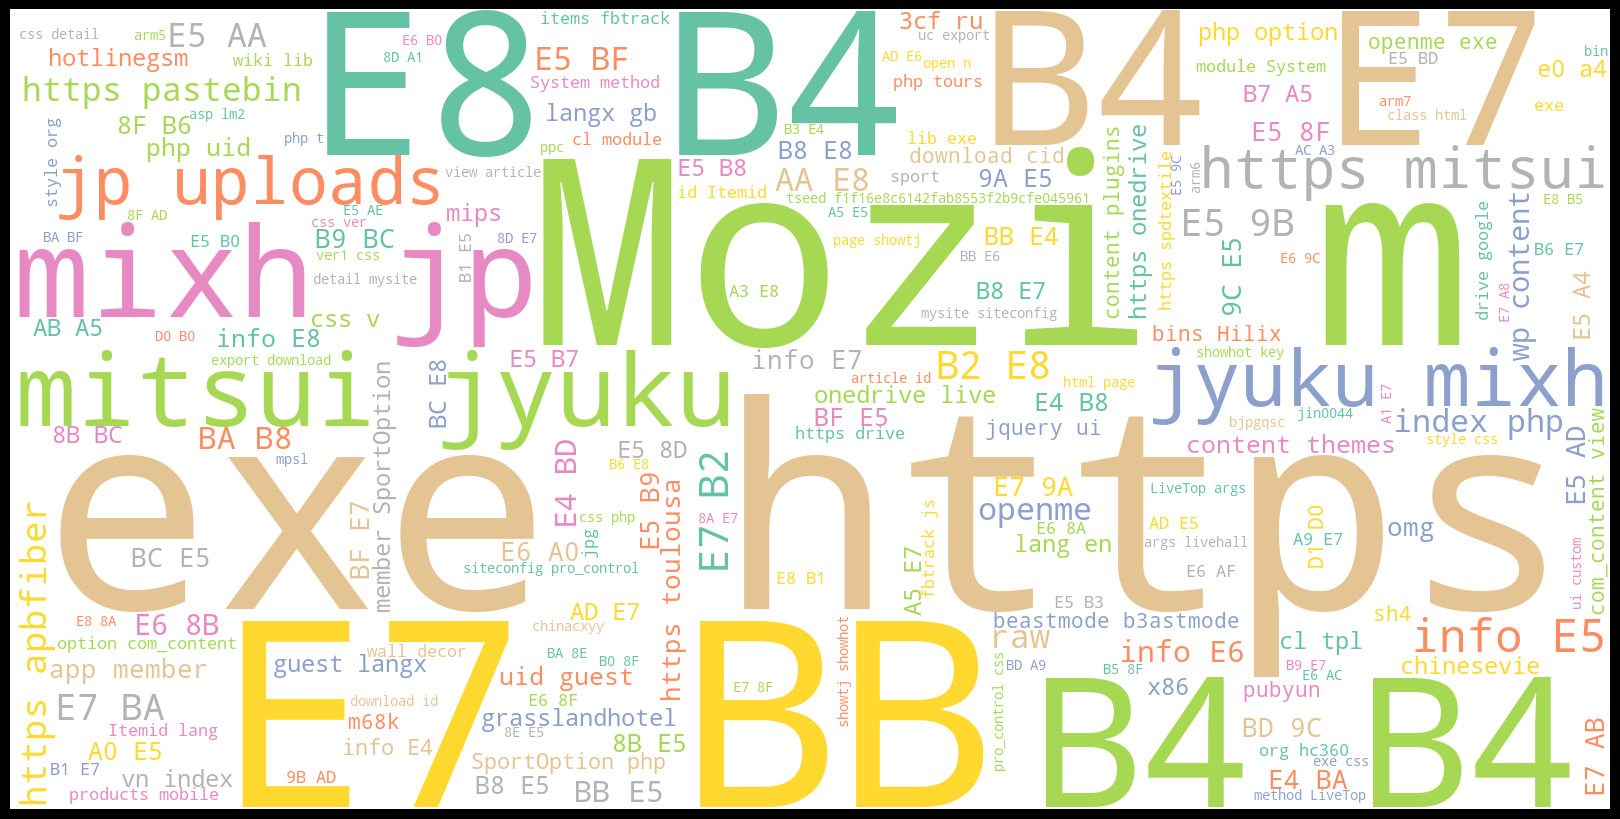

In [12]:
malware_url = " ".join(i for i in df_malware.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(malware_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/malware_wordcloud.png')

In [13]:
df = pd.read_csv("preprocessed_data.csv")

# Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type_code'] = label_encoder.fit_transform(df['type'])
df['type_code'].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [15]:
print("Encoded Labels:", df['type_code'].value_counts().sort_index().index.tolist())
print("Corresponding Strings:", label_encoder.inverse_transform(df['type_code'].value_counts().sort_index().index.tolist()))

Encoded Labels: [0, 1, 2, 3]
Corresponding Strings: ['benign' 'defacement' 'malware' 'phishing']


In [16]:
df.columns

Index(['Unnamed: 0', 'url', 'type', 'use_of_ip', 'abnormal_url',
       'google_index', 'count.', 'count-www', 'count@', 'count_dir',
       'count_embed_domain', 'sus_url', 'short_url', 'count_https',
       'count_http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'fd_length', 'tld_length', 'count_digits',
       'count_letters', 'type_code'],
      dtype='object')

# Creation of Feature & Target

In [17]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count%', 'count?', 'count-', 'count=', 'url_length', 'count_https',
       'count_http', 'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count_digits',
       'count_letters']]

In [18]:
Y = df['type_code']

In [19]:
X.shape

(651191, 21)

In [20]:
Y.shape

(651191,)

# Split the Dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , shuffle = True, random_state = 42)

In [23]:
X_train.shape , Y_train.shape

((520952, 21), (520952,))

In [24]:
X_test.shape , Y_test.shape

((130239, 21), (130239,))

In [25]:
X_train

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domain,short_url,count%,count?,...,count=,url_length,count_https,count_http,hostname_length,sus_url,fd_length,tld_length,count_digits,count_letters
461072,0,0,2,0,0,2,0,0,0,0,...,0,40,0,0,0,0,4,-1,0,34
621879,0,0,2,0,0,2,0,0,0,0,...,0,26,0,0,0,0,4,-1,3,19
376801,0,0,2,0,0,2,0,0,0,0,...,0,30,0,0,0,0,4,-1,0,26
560108,0,0,1,0,0,4,0,0,0,0,...,0,42,0,0,0,0,11,-1,0,36
454327,0,0,2,0,0,1,0,0,0,0,...,0,25,0,0,0,0,7,-1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644167,0,0,3,1,0,1,0,1,0,0,...,0,32,0,0,0,0,16,-1,0,27
259178,0,0,1,0,0,0,0,0,0,0,...,0,15,0,0,0,0,0,-1,3,11
365838,0,1,3,1,0,1,0,0,0,1,...,5,98,0,1,17,0,9,2,11,67
131932,0,0,2,0,0,3,0,0,0,0,...,0,53,0,0,0,0,11,-1,7,39


In [26]:
X_train.values

array([[ 0,  0,  2, ..., -1,  0, 34],
       [ 0,  0,  2, ..., -1,  3, 19],
       [ 0,  0,  2, ..., -1,  0, 26],
       ...,
       [ 0,  1,  3, ...,  2, 11, 67],
       [ 0,  0,  2, ..., -1,  7, 39],
       [ 0,  0,  2, ..., -1,  0, 35]], dtype=int64)

In [27]:
X.shape

(651191, 21)

In [28]:
Y.shape

(651191,)

In [29]:
X_train.shape

(520952, 21)

# Model Building

## Classification report Fuction

In [30]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support, classification_report

def result(y_pred , y_test):
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    precision , recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    
    res = {
        "Accuracy": accuracy,
        "Precision" : precision,
        "Recall" : recall,
        "F1-Score" : f1_score,
        "Support" : support
    }
    
    print(classification_report(y_test, y_pred ,target_names=['benign', 'defacement','phishing','malware']))
    
    
    
    return res
    

In [31]:
from sklearn.metrics import confusion_matrix

def create_confusion_metric(y_pred , y_test):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True,fmt=".1f")
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    
    plt.show()
    

In [32]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Model Pipeline

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

# Defining classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}


Training Logistic Regression...


C:\Users\aqsab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


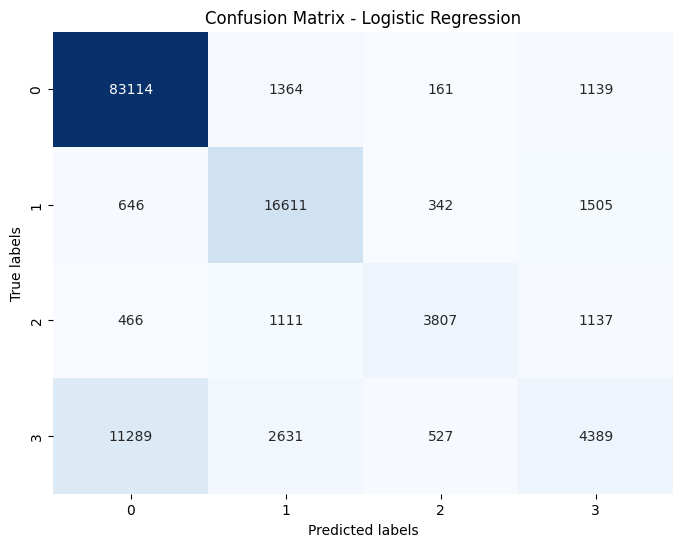


Logistic Regression classifier: Training Results
Training accuracy: 0.8293220872556397
Training precision: 0.803474903418304
Training recall: 0.8293220872556397
Training F1 score: 0.8047278892881357

Logistic Regression classifier: Testing Results
Testing accuracy: 0.8286381192
Testing Precision: 0.8024080396
Testing Recall: 0.8286381192
Testing F1 score: 0.8038425511

Training Decision Tree...


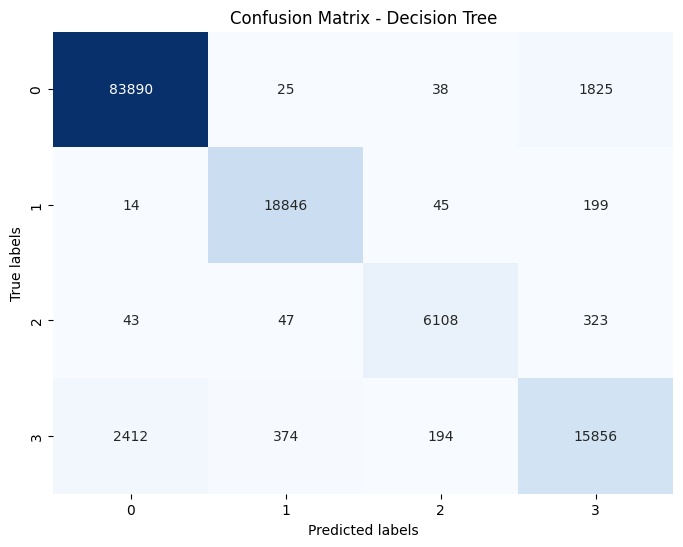


Decision Tree classifier: Training Results
Training accuracy: 0.9861561141909427
Training precision: 0.9860806372874145
Training recall: 0.9861561141909427
Training F1 score: 0.9860523050155543

Decision Tree classifier: Testing Results
Testing accuracy: 0.9574704965
Testing Precision: 0.9569594455
Testing Recall: 0.9574704965
Testing F1 score: 0.9571627657

Training Random Forest...


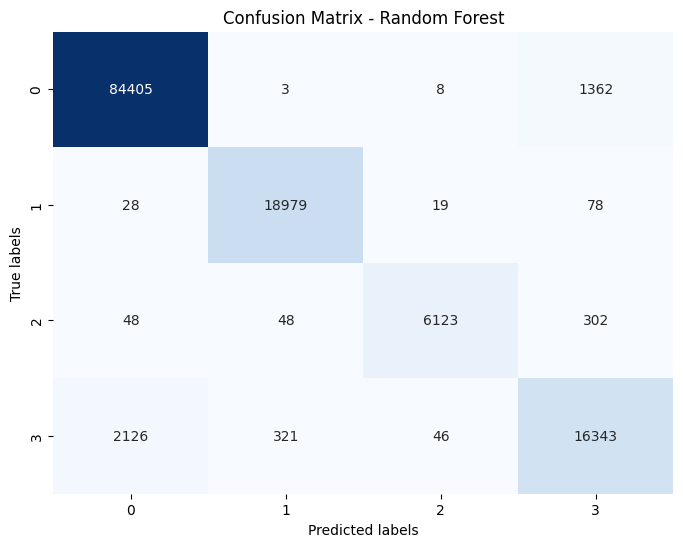


Random Forest classifier: Training Results
Training accuracy: 0.9861445968150616
Training precision: 0.9860795478203812
Training recall: 0.9861445968150616
Training F1 score: 0.9860826989518108

Random Forest classifier: Testing Results
Testing accuracy: 0.9663004169
Testing Precision: 0.9659138827
Testing Recall: 0.9663004169
Testing F1 score: 0.9660017523



In [34]:

# Train and evaluate each model
for model_name, model in models.items():
    print(colored(f"Training {model_name}...", 'red', attrs=['bold']))
    
    # Fit model to training data
    model.fit(X_train, Y_train)
    
    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate performance metrics for Train Data
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    train_precision = precision_score(Y_train, y_train_pred, average='weighted')
    train_recall = recall_score(Y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
    
    
    # Calculate performance metrics for Test Data
    accuracy = accuracy_score(Y_test, y_test_pred)
    precision = precision_score(Y_test, y_test_pred, average='weighted')
    recall = recall_score(Y_test, y_test_pred, average='weighted')
    f1 = f1_score(Y_test, y_test_pred, average='weighted')
    
    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_test_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
 
    print(""*5)
    # Print results Train Data
    print(colored(f"{model_name} classifier: Training Results", 'green', attrs=['bold']))
    print("Training accuracy:", train_accuracy)
    print("Training precision:", train_precision)
    print("Training recall:", train_recall)
    print("Training F1 score:", train_f1)
    print("="*50)
    print(""*5)
    
    # Print results Test Data
    print(colored(f"{model_name} classifier: Testing Results", 'green', attrs=['bold']))
    print(f"Testing accuracy: {accuracy:.10f}")
    print(f"Testing Precision: {precision:.10f}")
    print(f"Testing Recall: {recall:.10f}")
    print(f"Testing F1 score: {f1:.10f}")
    print("="*50)
    print(""*5)

Hyperparameter Tuning

In [35]:
# Logistic Regression
log_reg_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

# Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [36]:
param_grid = {
    "Logistic Regression": log_reg_param_grid,
    "Decision Tree": dt_param_grid,
    "Random Forest": rf_param_grid,
}

In [37]:
# Set up the hyperparameters to be tuned for each model
param_grid = {
    "Logistic Regression": {
        "C": [0.1, 1.0, 10.0],
        "penalty": ["l1", "l2"],
        'multi_class': ['auto', 'ovr', 'multinomial']
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10]
    }
    
}


Tuning hyperparameters for Logistic Regression...


C:\Users\aqsab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aqsab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best hyperparameters: {'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2'}
Training accuracy: 0.8636707442693934
Validation accuracy: 0.8611706170962615
Logistic Regression classifier: True Positives (TP) for each class:
TP: [83464 17897  4711  6086]
Logistic Regression classifier: False Positives (FP) for each class:
FP: [10785  4152  1541  1603]
Logistic Regression classifier: True Negatives (TN) for each class:
TN: [ 33676 106983 122177 109800]
Logistic Regression classifier: False Negatives (FN) for each class:
FN: [ 2314  1207  1810 12750]


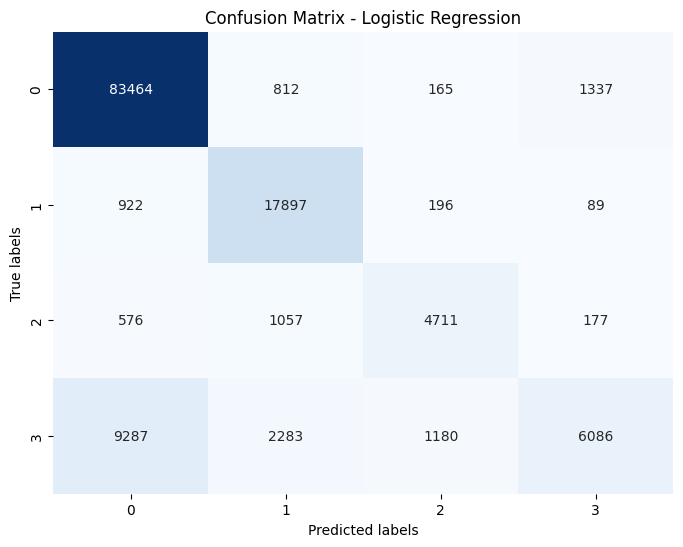


Logistic Regression classifier: Training Results
Training accuracy: 0.8621024585758381
Training precision: 0.8553390688573784
Training recall: 0.8621024585758381
Training F1 score: 0.842492461583588

Logistic Regression classifier: Testing Results
Testing accuracy: 0.8611706171
Testing Precision: 0.8545188841
Testing Recall: 0.8611706171
Testing F1 score: 0.8415816826

Tuning hyperparameters for Decision Tree...
Best hyperparameters: {'criterion': 'entropy', 'max_depth': None}
Training accuracy: 0.9566812296407997
Validation accuracy: 0.9576931641059897
Decision Tree classifier: True Positives (TP) for each class:
TP: [83918 18813  6125 15873]
Decision Tree classifier: False Positives (FP) for each class:
FP: [2423  455  312 2320]
Decision Tree classifier: True Negatives (TN) for each class:
TN: [ 42038 110680 123406 109083]
Decision Tree classifier: False Negatives (FN) for each class:
FN: [1860  291  396 2963]


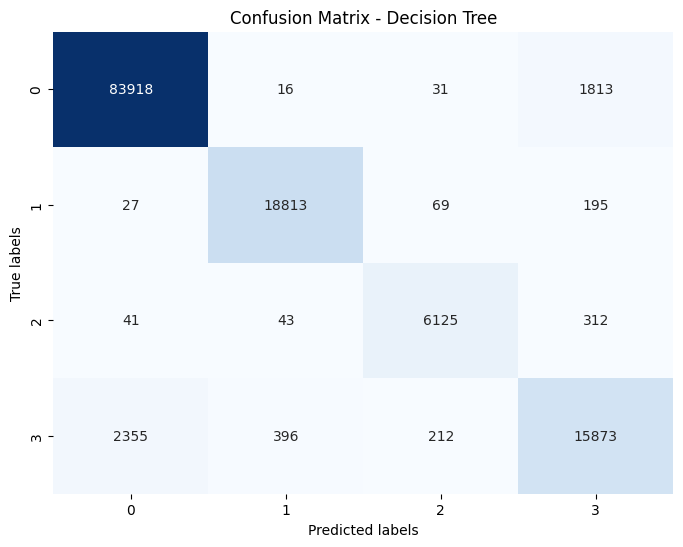


Decision Tree classifier: Training Results
Training accuracy: 0.9861561141909427
Training precision: 0.9860806372874145
Training recall: 0.9861561141909427
Training F1 score: 0.9860523050155543

Decision Tree classifier: Testing Results
Testing accuracy: 0.9576931641
Testing Precision: 0.9571833664
Testing Recall: 0.9576931641
Testing F1 score: 0.9573893778

Tuning hyperparameters for Random Forest...
Best hyperparameters: {'max_depth': None, 'n_estimators': 300}
Training accuracy: 0.9659565566785068
Validation accuracy: 0.9669223504480224
Random Forest classifier: True Positives (TP) for each class:
TP: [84453 18989  6130 16359]
Random Forest classifier: False Positives (FP) for each class:
FP: [2192  358   73 1685]
Random Forest classifier: True Negatives (TN) for each class:
TN: [ 42269 110777 123645 109718]
Random Forest classifier: False Negatives (FN) for each class:
FN: [1325  115  391 2477]


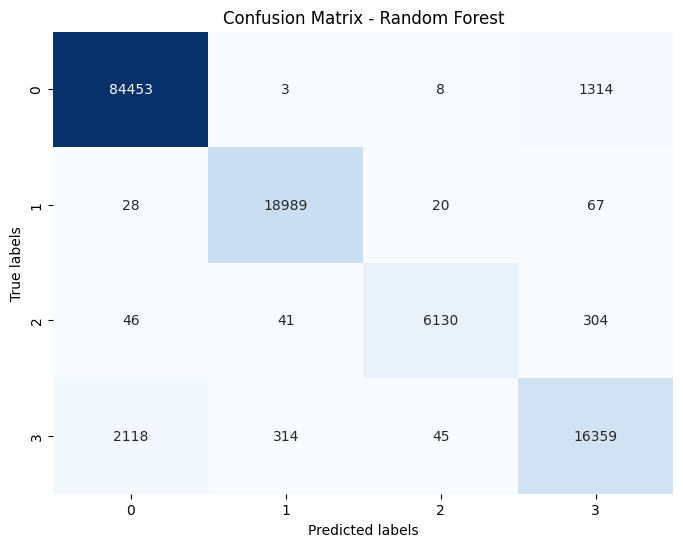


Random Forest classifier: Training Results
Training accuracy: 0.9861561141909427
Training precision: 0.986088262260657
Training recall: 0.9861561141909427
Training F1 score: 0.9860897550837565

Random Forest classifier: Testing Results
Testing accuracy: 0.9669223504
Testing Precision: 0.9665286806
Testing Recall: 0.9669223504
Testing F1 score: 0.9666140647



In [38]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer



# Set up the cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the scoring metric
scoring_metric = make_scorer(accuracy_score)



# Perform the grid search for each model and print the best hyperparameters
for model_name, model in models.items():
    
    print(colored(f"Tuning hyperparameters for {model_name}...", 'red', attrs=['bold']))
    
    clf = GridSearchCV(model, param_grid[model_name], scoring=scoring_metric, cv=cv)
    
    clf.fit(X_train, Y_train)
    
    print(f"Best hyperparameters: {clf.best_params_}")
    print(f"Training accuracy: {clf.best_score_}")
    print(f"Validation accuracy: {accuracy_score(Y_test, clf.predict(X_test))}")
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate performance metrics for Train Data
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    train_precision = precision_score(Y_train, y_train_pred, average='weighted')
    train_recall = recall_score(Y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
    
    
    # Calculate performance metrics for Test Data
    accuracy = accuracy_score(Y_test, y_test_pred)
    precision = precision_score(Y_test, y_test_pred, average='weighted')
    recall = recall_score(Y_test, y_test_pred, average='weighted')
    f1 = f1_score(Y_test, y_test_pred, average='weighted')
    
    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_test_pred)
    
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    TN = np.sum(cm) - (TP + FP + FN)
    
    # Display TP, FP, TN, FN
    print(colored(f"{model_name} classifier: True Positives (TP) for each class:", 'blue', attrs=['bold']))
    print("TP:", TP)
    print(colored(f"{model_name} classifier: False Positives (FP) for each class:", 'blue', attrs=['bold']))
    print("FP:", FP)
    print(colored(f"{model_name} classifier: True Negatives (TN) for each class:", 'blue', attrs=['bold']))
    print("TN:", TN)
    print(colored(f"{model_name} classifier: False Negatives (FN) for each class:", 'blue', attrs=['bold']))
    print("FN:", FN)
    print("="*50)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'confusion_matrix_{model_name}.png')

    plt.show()
    

    print(""*5)
    # Print results Train Data
    print(colored(f"{model_name} classifier: Training Results", 'green', attrs=['bold']))
    print("Training accuracy:", train_accuracy)
    print("Training precision:", train_precision)
    print("Training recall:", train_recall)
    print("Training F1 score:", train_f1)
    print("="*50)
    print(""*5)
    
    # Print results Test Data
    print(colored(f"{model_name} classifier: Testing Results", 'green', attrs=['bold']))
    print(f"Testing accuracy: {accuracy:.10f}")
    print(f"Testing Precision: {precision:.10f}")
    print(f"Testing Recall: {recall:.10f}")
    print(f"Testing F1 score: {f1:.10f}")
    print("="*50)
    print(""*5)